In [1]:
#import libraries
from keras.datasets import reuters
import keras
import numpy as np

In [2]:
#split dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


C:\Users\19312\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\19312\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
#size of my train 
len(train_data)

8982

In [4]:
#size of my test
len(test_data)

2246

In [5]:
#word indice 
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

In [9]:
#prep data 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#validate approach 

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
#train model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 74ms/step - loss: 2.9754 - accuracy: 0.3819 - val_loss: 1.6002 - val_accuracy: 0.6610
Epoch 2/20
16/16 [==============================] - 0s 26ms/step - loss: 1.4059 - accuracy: 0.7045 - val_loss: 1.2499 - val_accuracy: 0.7240
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 1.0308 - accuracy: 0.7791 - val_loss: 1.0840 - val_accuracy: 0.7700
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 0.8021 - accuracy: 0.8279 - val_loss: 0.9932 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 0s 25ms/step - loss: 0.6279 - accuracy: 0.8661 - val_loss: 0.9496 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.5221 - accuracy: 0.8899 - val_loss: 0.9105 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 0s 26ms/step - loss: 0.4071 - accuracy: 0.9145 - val_loss: 0.9079 - val_accuracy: 0.8030
Epoch 8/20
16

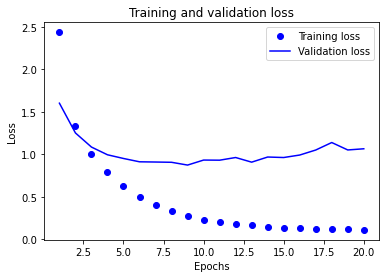

In [16]:
# plot the train and validate loss 
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

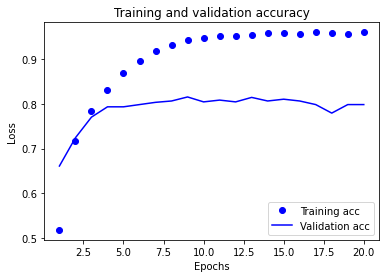

In [17]:

plt.clf()   # clear figure

#val_acc = history.history['acc']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
#overfitting around 8 epochs

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 35ms/step - loss: 3.2069 - accuracy: 0.4122 - val_loss: 1.7893 - val_accuracy: 0.6370
Epoch 2/8
16/16 [==============================] - 0s 23ms/step - loss: 1.5583 - accuracy: 0.6914 - val_loss: 1.3349 - val_accuracy: 0.7120
Epoch 3/8
16/16 [==============================] - 0s 24ms/step - loss: 1.1141 - accuracy: 0.7697 - val_loss: 1.1598 - val_accuracy: 0.7460
Epoch 4/8
16/16 [==============================] - 0s 24ms/step - loss: 0.8716 - accuracy: 0.8140 - val_loss: 1.0465 - val_accuracy: 0.7790
Epoch 5/8
16/16 [==============================] - 0s 27ms/step - loss: 0.6840 - accuracy: 0.8559 - val_loss: 0.9679 - val_accuracy: 0.7940
Epoch 6/8
16/16 [==============================] - 0s 27ms/step - loss: 0.5496 - accuracy: 0.8834 - val_loss: 0.9178 - val_accuracy: 0.8180
Epoch 7/8
16/16 [==============================] - 0s 26ms/step - loss: 0.4438 - accuracy: 0.9060 - val_loss: 0.9069 - val_accuracy: 0.8080
Epoch 8/8
71/71 [===

In [19]:
results

[0.9707803130149841, 0.7862867116928101]

In [20]:
import copy 

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1856634016028495

In [21]:
#new prediction on new data
predictions = model.predict(x_test)

In [22]:
predictions[0].shape

(46,)

In [23]:
np.sum(predictions[0])

0.9999999

In [24]:
np.argmax(predictions[0])

3

In [25]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [26]:

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [27]:

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 3.3941 - accuracy: 0.2070 - val_loss: 2.2271 - val_accuracy: 0.5440
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 1.9713 - accuracy: 0.5509 - val_loss: 1.6211 - val_accuracy: 0.5950
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 1.4654 - accuracy: 0.6244 - val_loss: 1.4303 - val_accuracy: 0.6430
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.2551 - accuracy: 0.6755 - val_loss: 1.3312 - val_accuracy: 0.6690
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0685 - accuracy: 0.7118 - val_loss: 1.2700 - val_accuracy: 0.6800
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9793 - accuracy: 0.7284 - val_loss: 1.2493 - val_accuracy: 0.7150
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.8661 - accuracy: 0.7784 - val_loss: 1.2392 - val_accuracy: 0.7150
Epoch 8/20
63